# I. Import library

In [603]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [604]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

from sklearn.model_selection import train_test_split

In [605]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Function

$w = (X^{T}.X)^{-1}.X^{T}.y$

In [606]:
def model(Xtrain, Ytrain):
  return np.linalg.inv(Xtrain.T @ Xtrain) @ Xtrain.T @ Ytrain

In [607]:
def perdict_normal_equaltion(Xtest, w, size):
  w = w.reshape(size, -1)
  return Xtest @ w

In [608]:
def evaluate_model(Ytest, pred):
  from sklearn.metrics import mean_squared_error
  print('MSE: ', mean_squared_error(Ytest, pre))
  from sklearn.metrics import r2_score
  print('R2_Score: {}%'.format(np.round(r2_score(Ytest, pre), 2) * 100))

In [609]:
def remove_outlier_boxplot(df, feature):
  # compute Q1 & Q3
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  # compute low_fence & up_fence
  IQR = Q3 - Q1
  low_fence = Q1 - 1.5 * IQR
  up_fence = Q3 + 1.5 * IQR
  # remove outliers
  return df[(df[feature] < up_fence) & (df[feature] > low_fence)]

# II. Apply for dataset

## 1. Dataset fish

###1. Preprocessing data & Create dataset


In [610]:
df = pd.read_csv('fish.csv')

In [611]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [612]:
features = ['Species', 'Length1', 'Length2','Length3', 'Height', 'Width', 'Weight']

In [613]:
print('mean Length1: ', df.Length1.mean())
print('mean Width: ', df.Width.mean())

mean Length1:  26.24716981132075
mean Width:  4.417485534591194


Data của các columns chênh nhau một lượng tương đối nhiều. Ví dụ Length1 vs width. Việc có sự chênh lệch này có thể gây ảnh hưởng xấu trong mô hình.

Ví dụ: Trọng số của Length1 là a, của width là b. Khi a tăng 1 đơn vị thì kết quả tăng khoảng 25.4, còn làm điều tương tự với b thì kết quả chỉ tăng 4.3.

Mình sẽ thử Standard data để giảm sự chênh lệch này.

In [614]:
for i in range(1, len(features) -1):
  df[[features[i]]] = standard_scaler.fit_transform(df[[features[i]]])

In [615]:
train, test = train_test_split(df, test_size = 0.3)

In [616]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 102 to 21
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  111 non-null    object 
 1   Weight   111 non-null    float64
 2   Length1  111 non-null    float64
 3   Length2  111 non-null    float64
 4   Length3  111 non-null    float64
 5   Height   111 non-null    float64
 6   Width    111 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.9+ KB


In [617]:
for i in range(1, len(features) -1):
  train = remove_outlier_boxplot(train, features[i])

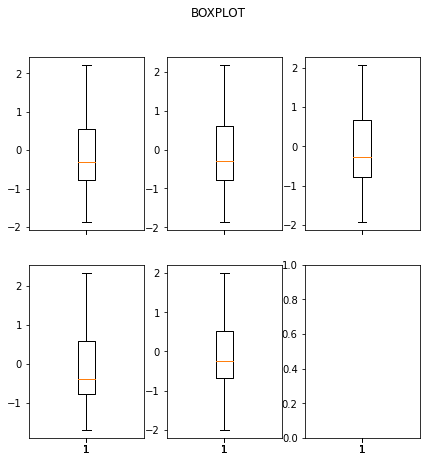

In [618]:
figure, axes = plt.subplots(2, 3, sharex=True, figsize=(7,7))
figure.suptitle('BOXPLOT')
axes[0][0].boxplot(train[features[1]])
axes[0][1].boxplot(train[features[2]])
axes[0][2].boxplot(train[features[3]])
axes[1][0].boxplot(train[features[4]])
axes[1][1].boxplot(train[features[5]]);

Nhận Xét: Các outlier đã bị loại bỏ ra khỏi dataframe

In [619]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 102 to 21
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  109 non-null    object 
 1   Weight   109 non-null    float64
 2   Length1  109 non-null    float64
 3   Length2  109 non-null    float64
 4   Length3  109 non-null    float64
 5   Height   109 non-null    float64
 6   Width    109 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.8+ KB


In [620]:
Xtrain = train[features[1:6]]
ytrain = train[features[-1]]

Xtest = test[features[1:6]]
ytest = test[features[-1]]

In [621]:
one = np.ones((Xtrain.shape[0], 1))
Xtrain = np.concatenate((one, Xtrain), axis = 1)

one = np.ones((Xtest.shape[0], 1))
Xtest = np.concatenate((one, Xtest), axis = 1)

###2. Train model

In [622]:
W = model(Xtrain, ytrain)

In [623]:
pre = perdict_normal_equaltion(Xtest, W, 6)

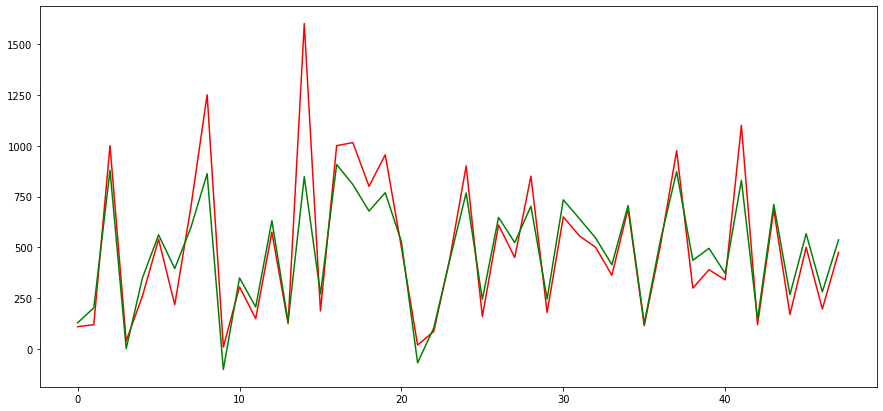

In [624]:
Xpre = np.arange(ytest.shape[0])
plt.figure(figsize=(15,7))
plt.plot(Xpre, ytest, color = 'r')
plt.plot(Xpre, pre, color= 'g')

### 3. Evaluate

In [625]:
evaluate_model(ytest, pre)

MSE:  23871.574212105566
R2_Score: 82.0%


## 2. Dataset insurance

###1. Preprocessing data & Create dataset


In [626]:
df = pd.read_csv('insurance.csv')

In [627]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [628]:
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [629]:
for i in [1, 4, 5]:
  df[features[i]] = label_encoder.fit_transform(df[features[i]])

In [630]:
df[['age']] = standard_scaler.fit_transform(df[['age']])
df[['bmi']] = standard_scaler.fit_transform(df[['bmi']])

In [631]:
train, test = train_test_split(df, test_size= 0.3)

In [632]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 995 to 113
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       936 non-null    float64
 1   sex       936 non-null    int64  
 2   bmi       936 non-null    float64
 3   children  936 non-null    int64  
 4   smoker    936 non-null    int64  
 5   region    936 non-null    int64  
 6   charges   936 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 58.5 KB


In [633]:
Xtrain = train[features[:6]]
Xtest = test[features[:6]]

# Thấy giá trị của Label quá lớn so với dữ liệu trong tập X. Nên chuẩn hóa nó theo đơn vị nghìn.
ytrain = train[features[-1]] /1000
ytest = test[features[-1]] /1000

In [634]:
one = np.ones((Xtrain.shape[0], 1))
Xtrain = np.concatenate((one, Xtrain), axis = 1)

one = np.ones((Xtest.shape[0], 1))
Xtest = np.concatenate((one, Xtest), axis = 1)

In [635]:
Xtrain = np.array(Xtrain).reshape(-1, 7)
Xtest = np.array(Xtest).reshape(-1, 7)
ytrain = np.array(ytrain).reshape(-1, 1)
ytest = np.array(ytest).reshape(-1, 1)

###3. Train model

In [636]:
W = model(Xtrain, ytrain)

In [637]:
print(W)

[[ 8.49829786]
 [ 3.55799734]
 [-0.24141558]
 [ 1.98356311]
 [ 0.37135042]
 [23.97196293]
 [-0.27675149]]


In [638]:
pre = perdict_normal_equaltion(Xtest, W, 7)

### 4. Evaluate

In [639]:
evaluate_model(ytest, pre)

MSE:  34.29816628379664
R2_Score: 75.0%


## 3. Dataset wine

###1. Preprocessing data & Create dataset


In [640]:
df = pd.read_csv('wine.csv')

In [641]:
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [642]:
df['total sulfur dioxide'] /= max(df['total sulfur dioxide'])

In [643]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [644]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [645]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [646]:
for i in [5, 6]:
  df[[features[i]]] = standard_scaler.fit_transform(df[[features[i]]])

In [647]:
train, test = train_test_split(df, test_size= 0.3)

In [648]:
for count in range(5):
  for i in range(len(features) -1):
    train = remove_outlier_boxplot(train, features[i])

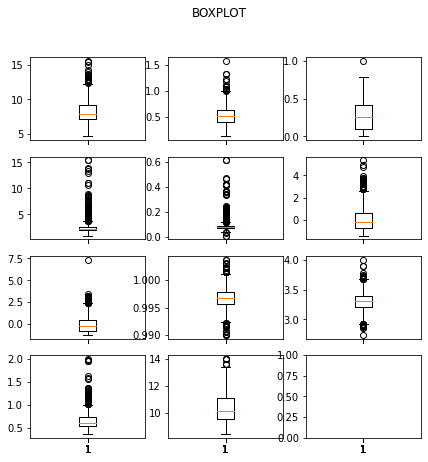

In [649]:
figure, axes = plt.subplots(4, 3, sharex=True, figsize=(7,7))
figure.suptitle('BOXPLOT')
axes[0][0].boxplot(train[features[0]])
axes[0][1].boxplot(train[features[1]])
axes[0][2].boxplot(train[features[2]])
axes[1][0].boxplot(train[features[3]])
axes[1][1].boxplot(train[features[4]])
axes[1][2].boxplot(train[features[5]])
axes[2][0].boxplot(train[features[6]])
axes[2][1].boxplot(train[features[7]])
axes[2][2].boxplot(train[features[8]])
axes[3][0].boxplot(train[features[9]])
axes[3][1].boxplot(train[features[10]]);

In [650]:
len(features)

12

In [651]:
Xtrain = train[features[:len(features) - 1]]
ytrain = train[features[-1]]

Xtest = test[features[:len(features) - 1]]
ytest = test[features[-1]]

In [652]:
one = np.ones((Xtrain.shape[0], 1))
Xtrain = np.concatenate((one, Xtrain), axis = 1)

one = np.ones((Xtest.shape[0], 1))
Xtest = np.concatenate((one, Xtest), axis = 1)

In [653]:
Xtrain = np.array(Xtrain).reshape(-1, 12)
Xtest = np.array(Xtest).reshape(-1, 12)
ytrain = np.array(ytrain).reshape(-1, 1)
ytest = np.array(ytest).reshape(-1, 1)

###3. Train model

In [654]:
W = model(Xtrain, ytrain)

In [655]:
print(W)

[[ 27.20669977]
 [  0.0560356 ]
 [ -1.16231632]
 [ -0.33242975]
 [  0.03292518]
 [ -1.51249185]
 [  0.04989664]
 [ -0.10788641]
 [-23.91016394]
 [ -0.27052973]
 [  0.79888541]
 [  0.28086549]]


In [656]:
pre = perdict_normal_equaltion(Xtest, W, 12)

### 4. Evaluate

In [657]:
evaluate_model(ytest, pre)

MSE:  0.44520883639300907
R2_Score: 33.0%


Kết quả không khả quan là dường như dữ liệu không phải tuyến tính.

In [658]:
# for j in range(len(features) -1):
#   for i in range(len(features) -1):
#     plt.scatter(df[features[j]], df[features[i]])
#     plt.show()


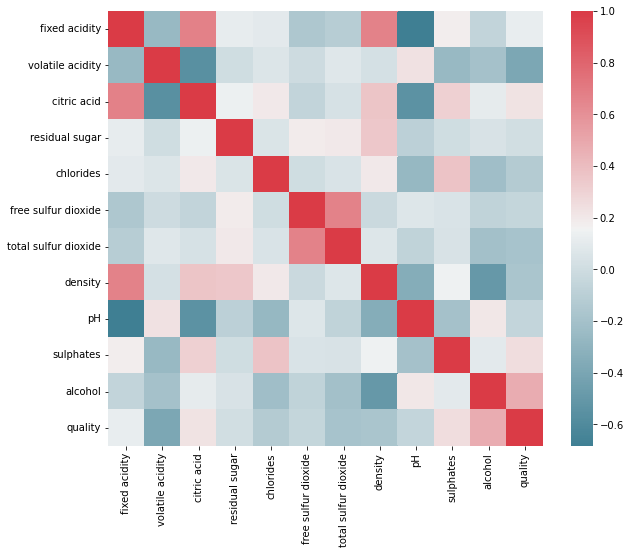

In [659]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Nhận xét: Do dữ liệu phân bố không theo dạng tuyến tính nên kết quả mô hình hồi quy tuyến tính ko cao.

## Dataset weather

###1. Preprocessing data & Create dataset


In [660]:
df = pd.read_csv('weather.csv')

In [661]:
df.head(5)

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,Cold
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,Warm
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,Normal
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,Cold
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,Cold


In [662]:
features = ['Temperature_c', 'Humidity', 'Wind_Speed_kmh','Wind_Bearing_degrees', 'Visibility_km', 'Pressure_millibars', 'Rain', 'Description']

In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


In [664]:
df[features[-1]] = label_encoder.fit_transform(df[[features[-1]]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [665]:
train, test = train_test_split(df, test_size= 0.3)

In [666]:
# for i in [3, 5]:
#   train[[features[i]]] = standard_scaler.fit_transform(train[[features[i]]])

In [667]:
for j in range(2):
  for i in [0, 1, 2, 3]:
    train = remove_outlier_boxplot(train, features[i])

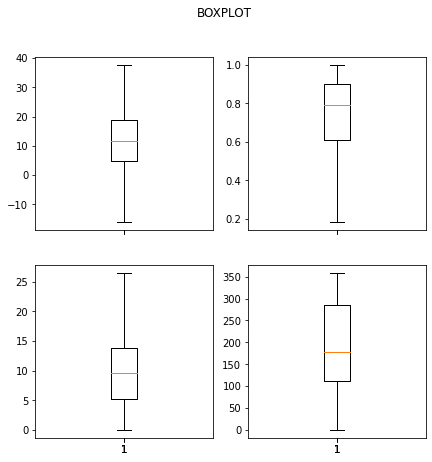

In [668]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(7,7))
figure.suptitle('BOXPLOT')

axes[0][0].boxplot(train[features[0]])
axes[0][1].boxplot(train[features[1]])
axes[1][0].boxplot(train[features[2]])
axes[1][1].boxplot(train[features[3]]);

In [669]:
Xtrain = train[features[1:]]
ytrain = train[features[0]]

Xtest = test[features[1:]]
ytest = test[features[0]]

In [670]:
one = np.ones((Xtrain.shape[0], 1))
Xtrain = np.concatenate((one, Xtrain), axis = 1)

one = np.ones((Xtest.shape[0], 1))
Xtest = np.concatenate((one, Xtest), axis = 1)

In [671]:
Xtrain = np.array(Xtrain).reshape(-1, 8)
Xtest = np.array(Xtest).reshape(-1, 8)
ytrain = np.array(ytrain).reshape(-1, 1)
ytest = np.array(ytest).reshape(-1, 1)

###2. Train model

In [672]:
W = model(Xtrain, ytrain)

In [673]:
print(W)

[[ 4.97433304e+00]
 [-9.38926292e+00]
 [-7.16249786e-02]
 [ 1.02995484e-03]
 [ 2.82356825e-02]
 [ 1.11930281e-04]
 [ 4.93093834e+00]
 [ 9.56951382e+00]]


In [674]:
pre = perdict_normal_equaltion(Xtest, W, 8)

### 3. Evaluate

In [675]:
evaluate_model(ytest, pre)

MSE:  12.703602562476556
R2_Score: 86.0%
